<a href="https://colab.research.google.com/github/Abdullah9974/Rice-leaf-disease-GClab-/blob/main/rice_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Apr  3 19:31:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 44kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
#importing the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
# resizing all the images resolution

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/rice_disease/train'
test_path = '/content/drive/MyDrive/rice_disease/test'


In [6]:
#import Inception V3 library as shown below and add preproccessing layer to the front VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87916544/87910968 [==============================] - 0s 0us/step


In [7]:
#Not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
#useful for getting number of output classess
folders = glob('/content/drive/MyDrive/rice_disease/train/*')

In [9]:
folders

['/content/drive/MyDrive/rice_disease/train/Bacterial leaf blight',
 '/content/drive/MyDrive/rice_disease/train/Leaf smut',
 '/content/drive/MyDrive/rice_disease/train/Brown spot']

In [10]:
# our layers
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create amodel object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
#Use the Image data Generator to import the images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Reading from training dataset

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/rice_disease/train',
                                                 target_size =(224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/rice_disease/test',
                                                 target_size =(224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 30 images belonging to 3 classes.


In [18]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 66s 5s/step - loss: 8.3873 - accuracy: 0.3712 - val_loss: 17.2828 - val_accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 4s 749ms/step - loss: 3.9501 - accuracy: 0.6408 - val_loss: 8.0447 - val_accuracy: 0.4000
Epoch 3/10
6/6 [==============================] - 4s 765ms/step - loss: 2.9608 - accuracy: 0.7511 - val_loss: 4.2928 - val_accuracy: 0.6333
Epoch 4/10
6/6 [==============================] - 4s 737ms/step - loss: 0.2706 - accuracy: 0.9541 - val_loss: 7.0382 - val_accuracy: 0.5667
Epoch 5/10
6/6 [==============================] - 4s 757ms/step - loss: 0.4367 - accuracy: 0.9408 - val_loss: 5.2132 - val_accuracy: 0.6333
Epoch 6/10
6/6 [==============================] - 4s 794ms/step - loss: 0.0729 - accuracy: 0.9629 - val_loss: 2.2058 - val_accuracy: 0.7333
Epoch 7/10
6/6 [==============================] - 4s 760ms/step - loss: 0.3032 - accuracy: 0.9628 - val_loss: 6.7232 - val_accuracy: 0.6000
Epoch 8/10
6/6 [=====

In [19]:
import matplotlib.pyplot as plt

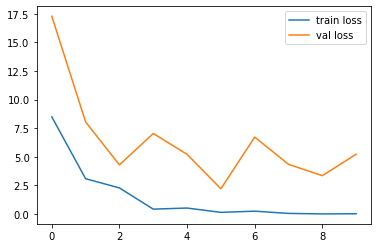

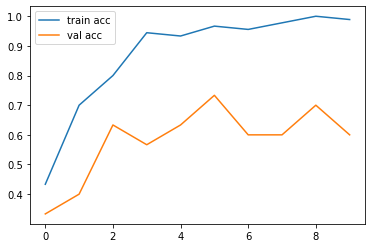

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

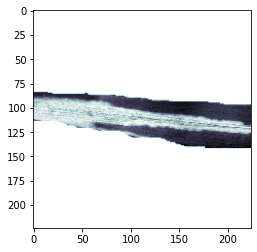

In [21]:
import matplotlib.pyplot as plt


testX, testY = test_set.next()
plt.imshow(testX[0][:,:,0], cmap='bone')

In [23]:

# saving as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [24]:
y_pred = model.predict(test_set)

In [25]:
y_pred

array([[3.87706242e-20, 9.97912228e-01, 2.08779750e-03],
       [2.10481719e-12, 9.68064368e-01, 3.19356024e-02],
       [1.13664366e-20, 1.00000000e+00, 2.39227549e-09],
       [8.58383009e-06, 9.99991417e-01, 2.06938444e-09],
       [1.42312648e-14, 1.00000000e+00, 1.33003730e-09],
       [9.99867201e-01, 1.32830261e-04, 1.63123581e-09],
       [6.54038333e-20, 1.00000000e+00, 2.30336861e-09],
       [5.23307231e-11, 9.99972939e-01, 2.70341916e-05],
       [4.86496358e-20, 1.00000000e+00, 8.98924490e-09],
       [2.47450693e-12, 9.99637127e-01, 3.62902356e-04],
       [6.75745824e-24, 9.99999285e-01, 7.54315749e-07],
       [2.33633669e-18, 9.99964356e-01, 3.56166565e-05],
       [1.00000000e+00, 2.96142382e-08, 4.26663201e-15],
       [1.00000000e+00, 1.52485004e-11, 4.58703388e-11],
       [1.52340546e-01, 7.73162365e-01, 7.44970664e-02],
       [1.18279215e-33, 9.99998331e-01, 1.66513769e-06],
       [2.82494750e-10, 6.34763157e-03, 9.93652344e-01],
       [4.40773665e-13, 1.00000